In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from matplotlib import gridspec
from pcf_pyplots.pcf_plots import get_histogramfrom_dir, estim_3p_ls, estim_2p_ls


In [17]:
TITLE = "elg 2iso"
DMAX = 140
BINS = 50
DD_iip, RR_iip, DR_iip, dummy = get_histogramfrom_dir("2iso_iip", "2iso")
DD_pip, RR_pip, DR_pip, dummy = get_histogramfrom_dir("2iso_pips", "2iso")
DD_2, RR_2, DR_2, dummy = get_histogramfrom_dir("2iso_binary", "2iso")
DD, RR, DR, dummy = get_histogramfrom_dir("2iso_nopips", "2iso")


In [18]:
eps_LS_iip = estim_2p_ls(DD_iip, RR_iip, DR_iip)
eps_LS_pip = estim_2p_ls(DD_pip, RR_pip, DR_pip)
eps_LS_2 = estim_2p_ls(DD_2, RR_2, DR_2)
eps_LS = estim_2p_ls(DD, RR, DR)

r = np.linspace(0,DMAX,BINS)

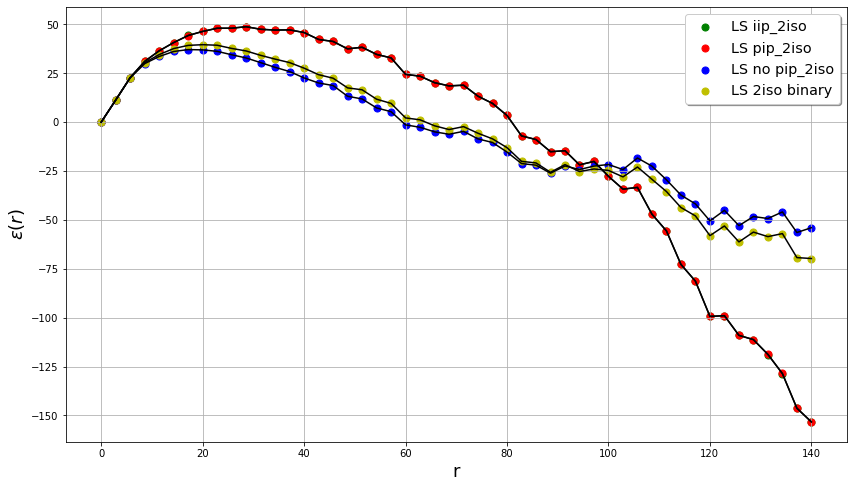

In [19]:
fig = plt.figure(figsize=(14,8))
plt.scatter(r,(r**2)*eps_LS_iip, s=BINS, c='g',label='LS iip_2iso')
plt.scatter(r,(r**2)*eps_LS_pip, s=BINS, c='r',label='LS pip_2iso')
plt.scatter(r,(r**2)*eps_LS, s=BINS, c='b',label='LS no pip_2iso')
plt.scatter(r,(r**2)*eps_LS_2, s=BINS, c='y',label='LS 2iso binary')
plt.plot(r,(r**2)*eps_LS_iip,'k-')
plt.plot(r,(r**2)*eps_LS_pip,'k-')
plt.plot(r,(r**2)*eps_LS,'k-')
plt.plot(r,(r**2)*eps_LS_2,'k-')
# plt.ylim(0,3)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid()
# plt.savefig(TITLE)
plt.show()

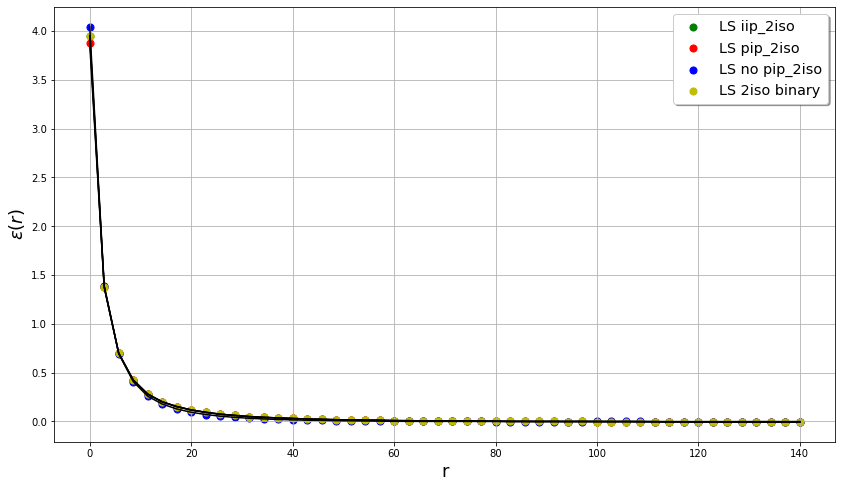

In [16]:
fig = plt.figure(figsize=(14,8))
plt.scatter(r,eps_LS_iip, s=BINS, c='g',label='LS iip_2iso')
plt.scatter(r,eps_LS_pip, s=BINS, c='r',label='LS pip_2iso')
plt.scatter(r,eps_LS, s=BINS, c='b',label='LS no pip_2iso')
plt.scatter(r,eps_LS_2, s=BINS, c='y',label='LS 2iso binary')
plt.plot(r,eps_LS_iip,'k-')
plt.plot(r,eps_LS_pip,'k-')
plt.plot(r,eps_LS,'k-')
plt.plot(r,eps_LS_2,'k-')
# plt.ylim(0,3)
plt.xlabel('r',fontsize=18)
plt.ylabel('$\epsilon(r)$',fontsize=18)
plt.legend(shadow=True, fontsize='x-large')
plt.grid()
# plt.savefig(TITLE)
plt.show()

In [3]:
def imag(x,y,t,cmap,limt,limt_):
    
    plt.figure(figsize=(6,6), dpi=100)
    plt.imshow(x,origin='lower',cmap=cmap, extent=[0,140,0,140],
               interpolation= 'bilinear', vmin=limt_, vmax=limt)
    cax=plt.colorbar()
    #plt.contour(x,10,cmap=plt.cm.Dark2,linewidths=1
    #            ,extent=[0,140,0,140],vmin=-limt, vmax=limt)

    plt.ylabel('$r_{\parallel}$',fontsize = 16)
    plt.xlabel('$r_{\perp}$',fontsize = 16)
    plt.title(y,fontsize = 16)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax.set_label(t,labelpad = 15,fontsize = 15)
    line_colour1 = ('royalblue', 'blue', 'mediumblue', 'darkblue')
    plt.plot()

In [4]:
DD_mesh = np.loadtxt('iip_2ani/dd.dat')
RR_mesh = np.loadtxt('iip_2ani/rr.dat')
DR_mesh = np.loadtxt('iip_2ani/dr.dat')

In [6]:
eps_LS = estim_LS(DD_mesh, RR_mesh, DR_mesh)

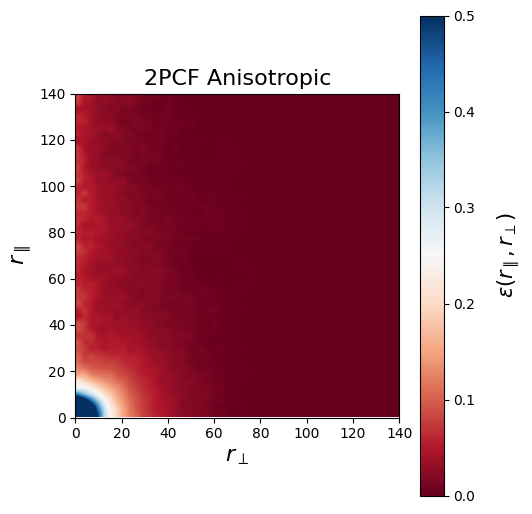

In [7]:
limt = 0.5
limt_ = 0

imag(eps_LS,'2PCF Anisotropic','$\epsilon(r_{\parallel},r_{\perp})$',cmap='RdBu', limt=limt, limt_=limt_)

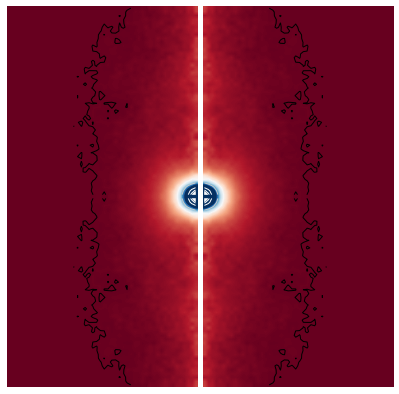

In [8]:
plt.figure(figsize = (7,7))
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
rotated_img = ndimage.rotate(np.rot90(eps_LS), 90)
plt.imshow(rotated_img, cmap='RdBu',interpolation= 'bilinear', vmin=limt_, vmax=limt)
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=1, vmin=limt_, vmax=limt)
plt.axis('off')
ax1 = plt.subplot(gs1[1])
rotated_img = ndimage.rotate(eps_LS.T,90)
plt.imshow(rotated_img, cmap='RdBu',interpolation= 'bilinear', vmin=limt_, vmax=limt)
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=1,  vmin=limt_, vmax=limt)
plt.axis('off')
ax1 = plt.subplot(gs1[2])
rotated_img = ndimage.rotate(eps_LS.T,-90)
plt.imshow(rotated_img, cmap='RdBu',interpolation= 'bilinear', vmin=limt_, vmax=limt)
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=1,  vmin=limt_, vmax=limt)
plt.axis('off')
ax1 = plt.subplot(gs1[3])
rotated_img = ndimage.rotate(eps_LS, 0)
plt.imshow(rotated_img, cmap='RdBu',interpolation= 'bilinear', vmin=limt_, vmax=limt)
plt.contour(rotated_img,10,cmap=plt.cm.gray,linewidths=1,  vmin=limt_, vmax=limt)
plt.axis('off')
plt.savefig('2PCFani_2.png',dpi=500)
plt.show()
